In [1]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
wca=pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
wca.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
wca.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

#### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [5]:
des_summ=wca.describe()

In [6]:
des_summ.drop('Buyer/Spender',axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
total=wca.groupby('Region')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum()

In [8]:
total

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [9]:
t_total=total.T

In [10]:
t_total.loc['Grand Total',:]=t_total.sum()

In [11]:
t_total

Region,Lisbon,Oporto,Other
Fresh,854833.0,464721.0,3960577.0
Milk,422454.0,239144.0,1888759.0
Grocery,570037.0,433274.0,2495251.0
Frozen,231026.0,190132.0,930492.0
Detergents_Paper,204136.0,173311.0,890410.0
Delicatessen,104327.0,54506.0,512110.0
Grand Total,2386813.0,1555088.0,10677599.0


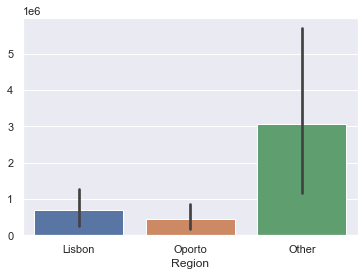

In [12]:
sns.barplot(data=t_total);

In [13]:
chn_tot=wca.groupby('Channel')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum()

In [14]:
chn_tot

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [15]:
t_chn_tot=chn_tot.T

In [16]:
t_chn_tot

Channel,Hotel,Retail
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988


In [17]:
t_chn_tot.loc['Grand Total',:]=t_chn_tot.sum()

In [18]:
t_chn_tot

Channel,Hotel,Retail
Fresh,4015717.0,1264414.0
Milk,1028614.0,1521743.0
Grocery,1180717.0,2317845.0
Frozen,1116979.0,234671.0
Detergents_Paper,235587.0,1032270.0
Delicatessen,421955.0,248988.0
Grand Total,7999569.0,6619931.0


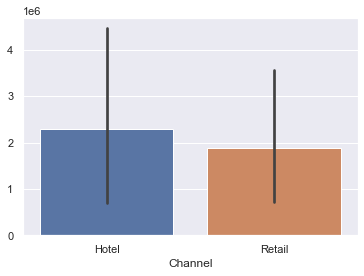

In [19]:
sns.barplot(data=t_chn_tot);

In [20]:
reg_chn=wca.groupby(['Region','Channel'])[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum()

In [21]:
reg_chn

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Region Channel                
Lisbon Hotel           70632  
       Retail          33695  
Oporto Hotel           30965  
       Retail          23541  
Other  Hotel          320358  
       Retail         191752

In [22]:
reg_chn['Sum']=reg_chn.sum(axis=1)

In [23]:
reg_chn

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen      Sum  
Region Channel                         
Lisbon Hotel           70632  1538342  
       Retail          33695   848471  
Oporto Hotel           30965   719150  
       Retail          23541   835938  
Other  Hotel          320358  5742077  
       Retail         191752  4935522

#### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [24]:
pivot=pd.pivot_table(wca,index=['Region','Channel'],aggfunc='sum')

In [25]:
pivot

Buyer/Spender  Delicatessen  Detergents_Paper    Fresh  \
Region Channel                                                           
Lisbon Hotel            14026         70632             56081   761233   
       Retail            4069         33695            148055    93600   
Oporto Hotel             8988         30965             13516   326215   
       Retail            5911         23541            159795   138506   
Other  Hotel            48020        320358            165990  2928269   
       Retail           16006        191752            724420  1032308   

                Frozen  Grocery     Milk  
Region Channel                            
Lisbon Hotel    184512   237542   228342  
       Retail    46514   332495   194112  
Oporto Hotel    160861   123074    64519  
       Retail    29271   310200   174625  
Other  Hotel    771606   820101   735753  
       Retail   158886  1675150  1153006

In [26]:
pivot2=pivot.drop('Buyer/Spender',axis=1)

In [27]:
pivot2

Delicatessen  Detergents_Paper    Fresh  Frozen  Grocery  \
Region Channel                                                             
Lisbon Hotel           70632             56081   761233  184512   237542   
       Retail          33695            148055    93600   46514   332495   
Oporto Hotel           30965             13516   326215  160861   123074   
       Retail          23541            159795   138506   29271   310200   
Other  Hotel          320358            165990  2928269  771606   820101   
       Retail         191752            724420  1032308  158886  1675150   

                   Milk  
Region Channel           
Lisbon Hotel     228342  
       Retail    194112  
Oporto Hotel      64519  
       Retail    174625  
Other  Hotel     735753  
       Retail   1153006

In [28]:
pivot2['Sum']=pivot2.sum(axis=1)

In [29]:
pivot2

Delicatessen  Detergents_Paper    Fresh  Frozen  Grocery  \
Region Channel                                                             
Lisbon Hotel           70632             56081   761233  184512   237542   
       Retail          33695            148055    93600   46514   332495   
Oporto Hotel           30965             13516   326215  160861   123074   
       Retail          23541            159795   138506   29271   310200   
Other  Hotel          320358            165990  2928269  771606   820101   
       Retail         191752            724420  1032308  158886  1675150   

                   Milk      Sum  
Region Channel                    
Lisbon Hotel     228342  1538342  
       Retail    194112   848471  
Oporto Hotel      64519   719150  
       Retail    174625   835938  
Other  Hotel     735753  5742077  
       Retail   1153006  4935522

#### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [30]:
std_dev=wca.std()

In [31]:
std_dev

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [32]:
mean=wca.mean()

In [33]:
mean

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [34]:
CV= std_dev/mean

In [35]:
CV

Buyer/Spender       0.576695
Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

#### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

In [36]:
wca2=wca.drop('Buyer/Spender', axis=1)

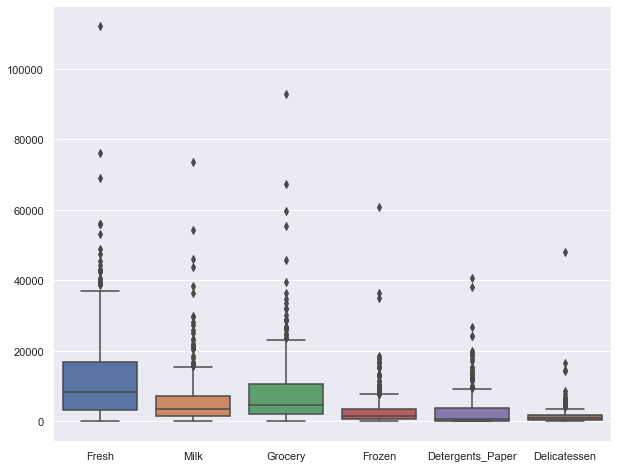

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(data=wca2);

### Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates.

In [38]:
news=pd.read_csv('Survey-1.csv')

In [39]:
news.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [40]:
news.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [41]:
news.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


#### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

###### 2.1.1. Gender and Major

In [42]:
gm=pd.crosstab(index=news['Gender'],columns=news['Major'])

In [43]:
gm

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


###### 2.1.2. Gender and Grad Intention

In [44]:
gg=pd.crosstab(index=news['Gender'],columns=news['Grad Intention'])

In [45]:
gg

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


###### 2.1.3. Gender and Employment

In [46]:
ge=pd.crosstab(index=news['Gender'],columns=news['Employment'])

In [47]:
ge

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


###### 2.1.4. Gender and Computer

In [48]:
gc=pd.crosstab(index=news['Gender'],columns=news['Computer'])

In [49]:
gc

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


#### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [50]:
news['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

###### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [51]:
(29/62)*100

46.774193548387096

###### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [52]:
(33/62)*100

53.2258064516129

#### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

###### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [53]:
gm

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [54]:
t_gm=gm.T

In [55]:
t_gm['Male']

Major
Accounting                4
CIS                       1
Economics/Finance         4
International Business    2
Management                6
Other                     4
Retailing/Marketing       5
Undecided                 3
Name: Male, dtype: int64

In [56]:
(t_gm['Male']/29)*100

Major
Accounting                13.793103
CIS                        3.448276
Economics/Finance         13.793103
International Business     6.896552
Management                20.689655
Other                     13.793103
Retailing/Marketing       17.241379
Undecided                 10.344828
Name: Male, dtype: float64

###### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [57]:
t_gm['Female']

Major
Accounting                3
CIS                       3
Economics/Finance         7
International Business    4
Management                4
Other                     3
Retailing/Marketing       9
Undecided                 0
Name: Female, dtype: int64

In [58]:
(t_gm['Female']/33)*100

Major
Accounting                 9.090909
CIS                        9.090909
Economics/Finance         21.212121
International Business    12.121212
Management                12.121212
Other                      9.090909
Retailing/Marketing       27.272727
Undecided                  0.000000
Name: Female, dtype: float64

#### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

###### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [59]:
gg

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [60]:
(17/29)*100

58.620689655172406

###### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [61]:
gc

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [62]:
(4/33)*100

12.121212121212121

#### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

###### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [63]:
ge

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [64]:
((29/62)+(10/62)-(7/62))*100

51.61290322580645

###### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [65]:
gm


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [66]:
((4/33)+(4/33))*100

24.242424242424242

#### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [67]:
gg2=gg.drop('Undecided',axis=1)

In [68]:
gg2

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


#### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

###### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [97]:
gpa3=pd.crosstab(index=news['Gender'],columns=news['GPA']<3)

In [98]:
gpa3

GPA,False,True
Gender,,
Female,25,8
Male,20,9


In [72]:
(17/62)*100

27.419354838709676

###### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [73]:
g_earn=pd.crosstab(index=news['Salary']>=50,columns=news['Gender'])

In [74]:
g_earn

Gender,Female,Male
Salary,,
False,15,15
True,18,14


In [75]:
(14/29)*100

48.275862068965516

In [76]:
(18/33)*100

54.54545454545454

#### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

##### We are going to perform Shapiro's Test to check the normal distribution of "GPA" in the given dataset, along with histogram

##### For Shapiro's Test,

H0 is "GPA" is normally distributed

H1 is "GPA" is not normally distributed

Alpha is 0.05

In [77]:
stats.shapiro(news['GPA'])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

##### Shapiro's Test indicates that p value is equal to 0.11204058676958084. Which is greater than 0.05, hence we fail to reject null hypothesis. With 95% confidence level we can say that "GPA" is normally distributed.

#### We are going to perform Shapiro's Test to check the normal distribution of "Salary" in the given dataset, along with histogram
For Shapiro's Test,
H0 is "Salary" is normally distributed

H1 is "Salary" is not normally distributed

Alpha is 0.05

In [79]:
stats.shapiro(news['Salary'])

ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)

##### Shapiro's Test indicates that p value is equal to 0.028000956401228905. Which is smaller than 0.05, hence we  reject null hypothesis. We have enough evidence to reject the null hypothesis in favour of alternative hypothesis. We can say that "Salary" is not normally distributed.

#### We are going to perform Shapiro's Test to check the normal distribution of "Spending" in the given dataset, along with histogram
For Shapiro's Test, H0 is "Spending" is normally distributed

H1 is "Spending" is not normally distributed

Alpha is 0.05

In [81]:
stats.shapiro(news['Spending'])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

#### Shapiro's Test indicates that p value is equal to 1.6854661225806922e-05. Which is smaller than 0.05, hence we reject null hypothesis.We have enough evidence to reject the null hypothesis in favour of alternative hypothesis. We can say that "Spending" is not normally distributed.

##### We are going to perform Shapiro's Test to check the normal distribution of "Text Messages" in the given dataset, along with histogram
For Shapiro's Test, H0 is "Text Messages" is normally distributed

H1 is "Text Messages" is not normally distributed

Alpha is 0.05

In [83]:
stats.shapiro(news['Text Messages'])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

##### Shapiro's Test indicates that p value is equal to 4.324040673964191e-06. Which is smaller than 0.05, hence we reject null hypothesis.We have enough evidence to reject the null hypothesis in favour of alternative hypothesis. We can say that "Text Messages" is not normally distributed.

### An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

In [85]:
shingles=pd.read_csv('A+&+B+shingles.csv')

In [86]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [87]:
shingles.isnull().sum()

A    0
B    5
dtype: int64

### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

###### H0 >=0.35
H1<0.35

alpha=0.05

In [88]:
t_statistic, p_value = stats.ttest_1samp(shingles.A, 0.35)

In [89]:
t_statistic

-1.4735046253382782

In [90]:
p_value/2

0.07477633144907513

###### Since p_value > 0.05, we fail to reject H0 . There is not enough evidence to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet.

In [91]:
t_statistic, p_value = stats.ttest_1samp(shingles.B, 0.35,nan_policy='omit')

In [92]:
t_statistic

-3.1003313069986995

In [93]:
p_value/2

0.0020904774003191826

###### Since p_value < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is less than 0.35 pounds per 100 square feet.

##### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

### H0 : μ(A)= μ(B)  

H1 : μ(A)!= μ(B)  

alpha = 0.05  


In [94]:
t_statistic,p_value=stats.ttest_ind(shingles['A'],shingles['B'] ,equal_var=True,nan_policy='omit') 

In [95]:
t_statistic

1.2896282719661123

In [96]:
p_value

0.2017496571835306

###### As the p_value > 0.05 , we fail to reject H0; and we can say that population mean for shingles A and B are equal. Test Assumptions, When running a two-sample t-test, the basic assumptions are that the distributions of the two populations are normal and variance is same.